Now, we will try to build a Prediction app by ourself which will predict the no. of calories burnt.

Importing Dependencies

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import warnings 
warnings.filterwarnings('ignore')

Data Collection and Analysis

In [79]:
data1 = pd.read_csv('calories.csv')
data2 = pd.read_csv('exercise.csv')

In [80]:
data1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [81]:
data2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [82]:
data = pd.concat([data2,data1['Calories']],axis=1)

In [83]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [84]:
data.shape

(15000, 9)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [86]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [87]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [88]:
data['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

Data Visualization

In [89]:
sns.set_theme()

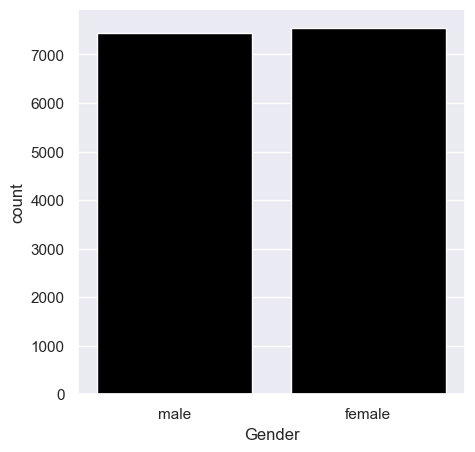

In [90]:
plt.figure(figsize=(5,5))
sns.countplot(x= data['Gender'],color="black")
plt.show()

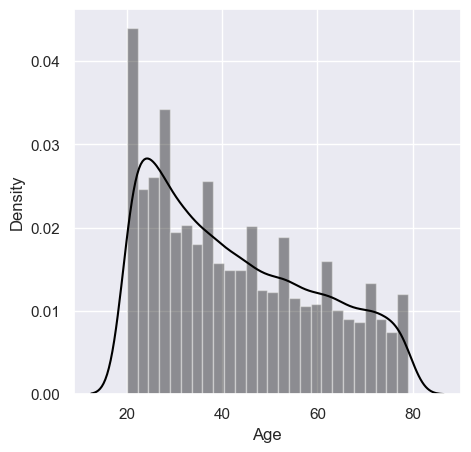

In [91]:
plt.figure(figsize=(5,5))
sns.distplot(data['Age'],color="black")
plt.show()

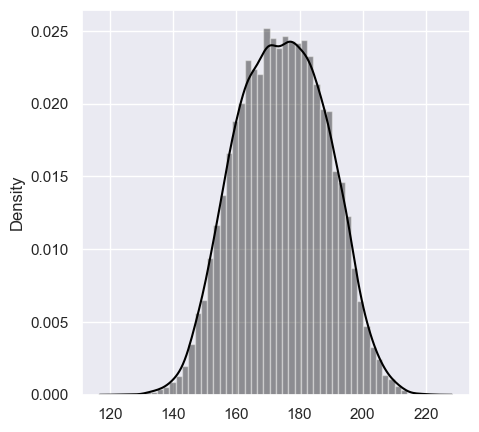

In [92]:
plt.figure(figsize=(5,5))
sns.distplot(x= data['Height'],color="black")
plt.show()

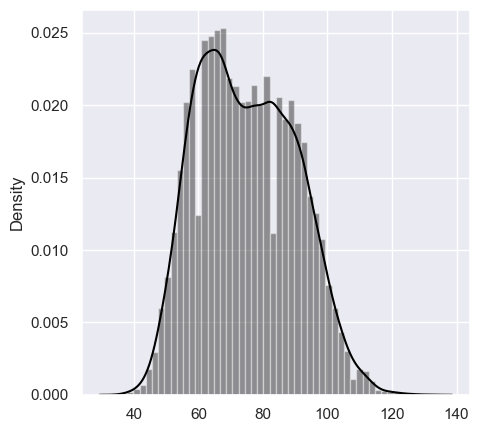

In [93]:
plt.figure(figsize=(5,5))
sns.distplot(x= data['Weight'],color="black")
plt.show()

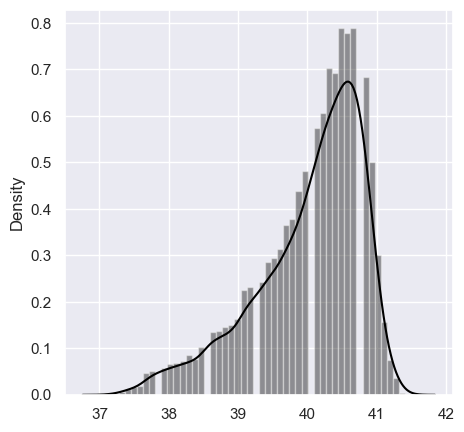

In [94]:
plt.figure(figsize=(5,5))
sns.distplot(x= data['Body_Temp'],color="black")
plt.show()

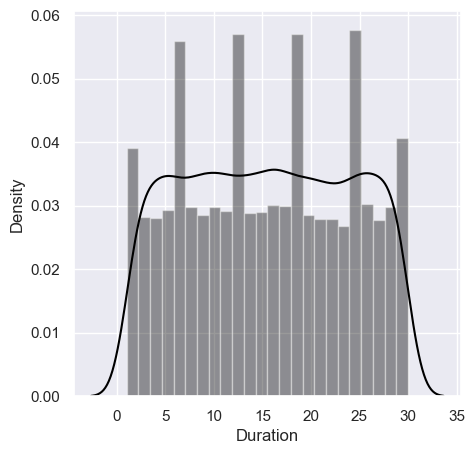

In [95]:
plt.figure(figsize=(5,5))
sns.distplot( data['Duration'],color="black")
plt.show()

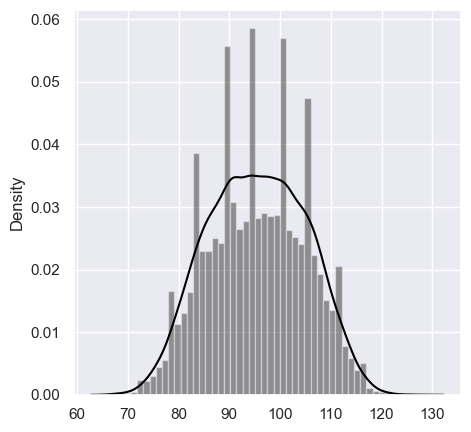

In [96]:
plt.figure(figsize=(5,5))
sns.distplot(x= data['Heart_Rate'],color="black")
plt.show()

Data Preprocessing

In [97]:
data.replace({'Gender' : {'male':0 , 'female': 1}},inplace=True)

In [98]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.0 MB


Correlation Map

In [100]:
correlation = data.corr()

<Axes: >

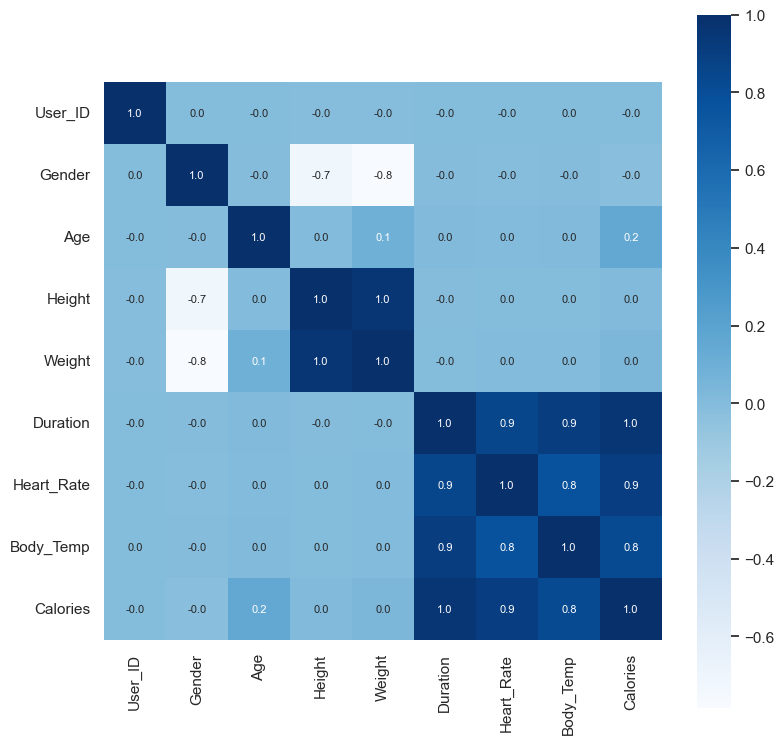

In [101]:
plt.figure(figsize=(9,9))
sns.heatmap(correlation,cmap='Blues',cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size':8})

In [102]:
X = data.drop(['User_ID','Calories'],axis=1)
Y = data['Calories']

In [103]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [104]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting of Data into Test data and Training Data 

In [105]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.22,random_state=0)

In [106]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (11700, 7) (3300, 7)


Model Selection and Evaluation with Default Parameter

importing all the models

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [108]:
models = [LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),XGBRegressor()]

for model in models:
    model.fit(X,Y)
    train_pred = model.predict(X_train)
    train_data_accuracy = mean_absolute_error(Y_train,train_pred)
    print(f'The Mean Absolute Error for the {model.__class__.__name__} is : {train_data_accuracy}')
    test_pred = model.predict(X_test)
    test_data_accuracy = mean_absolute_error(Y_test,test_pred)
    print(f'The Mean Absolute Error for the {model.__class__.__name__} is : {test_data_accuracy}')
    print('-------------------------------------------------------------------------------------------------------------------')


The Mean Absolute Error for the LinearRegression is : 8.418465360831236
The Mean Absolute Error for the LinearRegression is : 8.114566930644596
-------------------------------------------------------------------------------------------------------------------
The Mean Absolute Error for the RandomForestRegressor is : 0.6255153846153847
The Mean Absolute Error for the RandomForestRegressor is : 0.618009090909091
-------------------------------------------------------------------------------------------------------------------
The Mean Absolute Error for the KNeighborsRegressor is : 4.06042735042735
The Mean Absolute Error for the KNeighborsRegressor is : 3.9136363636363636
-------------------------------------------------------------------------------------------------------------------
The Mean Absolute Error for the XGBRegressor is : 0.944315042021947
The Mean Absolute Error for the XGBRegressor is : 0.9628539020003695
------------------------------------------------------------------

Inference : From the above mean absolute error , we can handpick two models from here due to there good performance , we will use one out of Random Forest Regressor and XGBregressor after hyper parameter tuning

now lets also compare with r2 score mertics

Cross Value Comparison

In [112]:
for model in models:
    cross_score = cross_val_score(model,X,Y,cv=5,scoring='r2')
    cross_average = sum(cross_score) / len(cross_score)
    print(f'The R squared values for the {model.__class__.__name__} is : {cross_score}')
    print(f'The average R squared Value for the {model.__class__.__name__} is : {cross_average}')
    print('---------------------------------------------------------------------------------------------')
    

The R squared values for the RandomForestRegressor is : [0.99806611 0.99792935 0.99800592 0.99772673 0.99800109]
The average R squared Value for the RandomForestRegressor is : 0.9979458405877593
---------------------------------------------------------------------------------------------
The R squared values for the XGBRegressor is : [0.99875855 0.99886654 0.99891382 0.99876181 0.9988351 ]
The average R squared Value for the XGBRegressor is : 0.9988271630420107
---------------------------------------------------------------------------------------------


HyperParameter tuning

In [110]:
models = [RandomForestRegressor(),XGBRegressor()]
model_params = {
    'random_forest_params' : {
        'n_estimators' : [100,200,300],
        'max_depth' : [None,10,20,30,40],
        'max_features' : ['auto','sqrt']
    }, 
    'XGB_params' : {
        'n_estimators' : [100,200,300,400],
        'learning_rate' : [0.01,0.05,0.1,0.2],
        'max_depth' : [3,5,7,9,10]
    }
}
model_keys = ['random_forest_params','XGB_params']
i=0
for model in models:
    key = model_keys[i]
    params = model_params[key]
    i+=1
    classifier = GridSearchCV(model,params,cv=5,scoring='r2')
    classifier.fit(X_train,Y_train)
    print('The Best parameters for ',model.__class__.__name__,'is : ',classifier.best_params_,'with the Best Score of : ',classifier.best_score_)
    print('----------------------------------------------------------------------------------------------------------------------------------')





The Best parameters for  RandomForestRegressor is :  {'max_depth': 40, 'max_features': 'sqrt', 'n_estimators': 300} with the Best Score of :  0.9958523481731005
----------------------------------------------------------------------------------------------------------------------------------
The Best parameters for  XGBRegressor is :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400} with the Best Score of :  0.999379572422102
----------------------------------------------------------------------------------------------------------------------------------


Final Predictive System

In [113]:
model = XGBRegressor(learning_rate = 0.1,max_depth = 5,n_estimators = 400)
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=400,
             n_jobs=None, num_parallel_tree=None, ...)

In [115]:
input_data = (0,68,190,94,29,105,40.8)
numpy_array = np.asarray(input_data)
reshaped = numpy_array.reshape(1,-1)
pred = model.predict(reshaped)
print('The Predicted Burnt Calorie is : ',pred[0])

The Predicted Burnt Calorie is :  234.28967
